# Data Visualization
This notebook provides visualizations for churn analysis, including churn rate by tenure and feature importance.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load your data
df = pd.read_csv('C:\\Users\\saife\\OneDrive\\Desktop\\Graduation\\data\\processed\\data_after_preprocessing.csv')
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,BalanceToSalary,ProductsPerTenure,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,1,1,1,0.021886,1,1,2,DIAMOND,464,-0.035804,-0.016781,False,False,False
1,-0.440036,0.198164,-1.387538,0.117350,1,0,1,0.216534,0,1,3,DIAMOND,456,-0.028930,0.967674,False,True,False
2,-1.536794,0.293517,1.032908,1.333053,3,1,0,0.240687,1,1,3,DIAMOND,377,-0.022868,-0.262894,False,False,False
3,0.501521,0.007457,-1.387538,-1.225848,2,0,0,-0.108918,0,0,5,GOLD,350,-0.035804,2.936584,False,False,False
4,2.063884,0.388871,-1.041760,0.785728,1,1,1,-0.365276,0,0,5,GOLD,425,-0.021154,-0.016781,False,True,False


## Churn Rate by Tenure
Visualize the churn rate segmented by customer tenure.

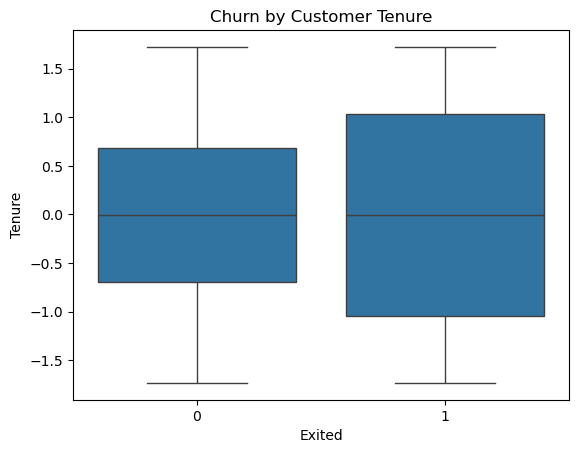

In [7]:
def plot_churn_by_tenure(df):
    sns.boxplot(x='Exited', y='Tenure', data=df)
    plt.title('Churn by Customer Tenure')
    plt.show()

# Example usage
plot_churn_by_tenure(df)

## Feature Importance Visualization
Display the top 10 most important features for churn prediction.

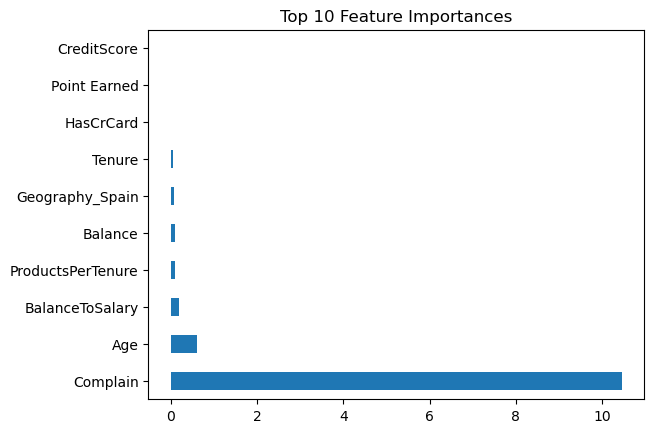

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split the data into features and target
X = df.drop(columns=['Exited'])
y = df['Exited']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Define the function to plot feature importance
def plot_feature_importance(importances, feature_names):
    importances_series = pd.Series(importances, index=feature_names)
    importances_series.nlargest(10).plot(kind='barh')
    plt.title('Top 10 Feature Importances')
    plt.show()

# Example usage
plot_feature_importance(model.coef_[0], X.columns)